<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/L2_A_B_interpoliacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0.16666667  0.66666667  0.16666667  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.16666667  0.66666667  0.16666667  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.16666667  0.66666667  0.16666667  0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.16666667  0.66666667  0.16666667
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.16666667  0.66666667
   0.16666667  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.16666667
   0.66666667  0.16666667  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.16666667  0.66666667  0.16666667  0.          0.          0

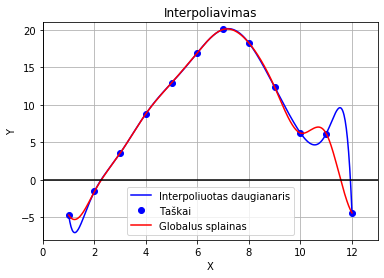

In [ ]:
#!/usr/bin/env python

import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
import time
import sympy as sym
from numpy import *
from matplotlib.pyplot import *


def Apsk(a, x, r):
    x.astype(float)
    n = len(a) - 1
    fff = a[n]
    for i in range(n - 1, -1, -1):
        fff = fff * (r - x[i]) + a[i]
    return fff


def ApskGlobalu(a, x, r, y):
    x.astype(float)
    nz = 0
    #print(x[11])
    for nn in range(len(x) -1):
      if x[nn] <= r and r < x[nn + 1]:
        nz = nn
        #print("x[nn] <= r and r >= x[nn + 1] ",x[nn], " <= ", r, " >= ", x[nn+1])
      elif r >= x[nn + 1]:
        #print("x[nn] <= r and r >= x[nn + 1] ",x[nn], " <= ", r, " >= ", x[nn+1])
        nz = nn
    
  # fi * x^2 / 2 -
  # fi * s^3 / 6*d +
  # fi+1 * s**3 / 6*di +
  # (yi+1/di - yi / di)  * s -
  # fi * (di / 3) *s -
  # fi+1 * (di/6 )*s + yi
    di = x[nz+1] - x[nz]
    
    #print("di = x[n+1] - x[n] = " , x[n+1] , "-",x[n] )
    s = r - x[nz]
    #print("s = r - x[n] = " , r , "-",x[n] )
    a1 = a[nz] * (s**2)/2
    a2 = a[nz]*(s**3)/(6*di)
    a3 = a[nz+1] * ((s**3)/(6*(di)))
    a4 = ((y[nz+1] - y[nz])/di) * s
    a5 = a[nz] * (di/3)*s
    a6 = a[nz+1] * (di/6)*s
    ggg = a1 - a2 + a3 + a4 - a5 - a6 + y[nz]

    return ggg


def calculateDistance(x1, y1, x2, y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist


xmin = 1.
xmax = 12.
N = 12
n = N-1
deltax = calculateDistance(xmin, 0, xmax, 0) / (N-1)

X = zeros(N)
Y = zeros(N)
Y = np.array([[-4.6993],    [-1.5529],    [3.55634],    [8.82652],    [12.9486],    [16.9681],
              [20.0556],    [18.2434],    [12.343],    [6.23618],    [6.16597],    [-4.406]])

X = np.array([[1],    [2],    [3],    [4],    [5],    [6],
              [7],    [8],    [9],    [10],    [11],    [12]])
# Niutono išraiška interpoliuojančiam daugianariui apskaičiuoti

F = zeros((N, N), dtype=float)
for i in range(0, N):
    F[i, 0] = Y[i]

for j in range(1, N):
    for i in range(j, N):
        F[i, j] = float(float(F[i, j-1]-F[i-1, j-1]) / float(X[i]-X[i-j]))
# print("F",F)
b = zeros(N, dtype=float)
for i in range(0, N):
    b[i] = F[i, i]


# print("B",b)
# Y=zeros(N)

xnow = xmin


############ GRAFIKU PAISYMAS ##########
t = linspace(1, 12, 500)
#y1 = zeros(len(t))


y1 = zeros(len(t))
for i in range(len(t)):
    y1[i] = Apsk(b, X, t[i])


plot(t, y1, 'b-')
xlabel('X')
ylabel('Y')
legend(['Duota funkcija exp(-x^3)*cos(x^2)*(x-3)', 'Interpoliavimas per tolygiai pasiskyrsciusius taskus',
        'Interpoliavimas per Čiobyševo abscisės taškus'])
title('Plotting two curves in the same plot')
################################
A = zeros((N, N), dtype=float)

d = 1
fdd1 = 0

for dd in range(N-2):
    A[dd, dd] = 1/6
    A[dd, dd+1] = 2/3
    A[dd, dd+2] = 1/6

dd = dd + 1
A[dd, 0] = 1/3
A[dd, 1] = 1/6
A[dd, N-2] = 1/6
A[dd, N-1] = 1/3

dd = dd + 1
A[dd, 0] = 1
A[dd, N-1] = -1

B = np.delete(A, 0, 1)
B = np.delete(B, N-2, 1)


B = np.delete(B, N-1, 0)
B = np.delete(B, N-2, 0)
print(A)
# print(B)

############################

YY = zeros(N)
YY = numpy.reshape(YY, (N, 1))
for i in range(N-2):
    YY[i] = (Y[i+2]-Y[i+1]) - (Y[i+1]-Y[i])

YY[i+1] = (Y[1]-Y[0])-(Y[n]-Y[n-1])
# print(YY)
################################

FF = linalg.solve(A, YY)
print("FF",FF)

################################
#t = linspace(1, 12, 500)
#y1 = zeros(len(t))


yf = zeros(len(t))

for i in range(0, len(t)):
    yf[i] = ApskGlobalu(FF, X, t[i], Y)
################################

x = reshape(X, 12, 1)
y = reshape(Y, 12, 1)

################################
#tck, u = interpolate.splprep([x,y], k =2, s=0)
#u=np.linspace(0, 1, num=200, endpoint=True)
# print(tck)
#out = interpolate.splev(u, tck)
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# plt.figure()
plot(x, y, 'bo')  # , out[0], out[1], 'r')
plot(t, yf, 'r-')
plt.legend([ 'Interpoliuotas daugianaris','Taškai', 'Globalus splainas'],loc='best')
#plt.axis([1, 20, -6, 21])
plt.axis([0, 13, -8, 21])

plt.title('Interpoliavimas')
plt.grid(True)
plt.aa = True
axhline(0, color='k')  # x = 0
axvline(0, color='k')  # y = 0
show()
